In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

In [3]:
qc = QuantumCircuit(100, 100)

for i in range(100):
    qc.h(i)
    qc.measure(i, i)

qc.draw('mpl')

In [4]:
backend = AerSimulator()
sampler = Sampler(backend)

In [5]:
job = sampler.run([qc])
result = job.result()[0]
result.data.c.get_counts()

{'1011101010101111111100111111100000100110011001111000010111011111000110111100111101110011100101010000': 1,
 '1000111100011000111110110000000100110101110111000110101101111110111101111110000101101110101001010001': 1,
 '1010011000101000110110111000111001101010010110100111000101101111100001111000011110110101000000000110': 1,
 '0010111101100010001000110010010110110010010110011101011110011110011101010110101001001111101001011110': 1,
 '0110111000101101101011100101101001011000000010000011100100010111101001101011100110001000111101100010': 1,
 '1010100000111001011011100101110100010000110110101001110001110110001111000110001010010100111001100001': 1,
 '1101111010111101010000000101001000101011010110100110001100101101111000101100110111010011001110011110': 1,
 '0100011000010110110000010111000001100010101000000011000111010111001010000100010011001001000010110101': 1,
 '0100100101000000111000101000100010111011000111101010010101110000111101000110000110000000110111010110': 1,
 '11100010111111111111100011

In [7]:
## Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(

    channel="ibm_quantum",

    token="8884c7e1645b2faee4865ee3d2d42a633973f09ce772128b2bcc0cebf27bf3e2add50dacb89e2237938f92b2f652c32de47614446e7b0c6193d3996700198764",

    set_as_default=True,

    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)

# Load saved credentials
service = QiskitRuntimeService()

In [8]:
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
backend.name

'ibm_brisbane'

In [9]:
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qcEx2_isa_circuit = pm.run(qc)
qcEx2_isa_circuit.draw(output="mpl", idle_wires=False, style="iqp")

(array([410., 409., 410., 409., 410., 409., 410., 409., 410., 410.]),
 array([   0. ,  409.5,  819. , 1228.5, 1638. , 2047.5, 2457. , 2866.5,
        3276. , 3685.5, 4095. ]),
 <BarContainer object of 10 artists>)

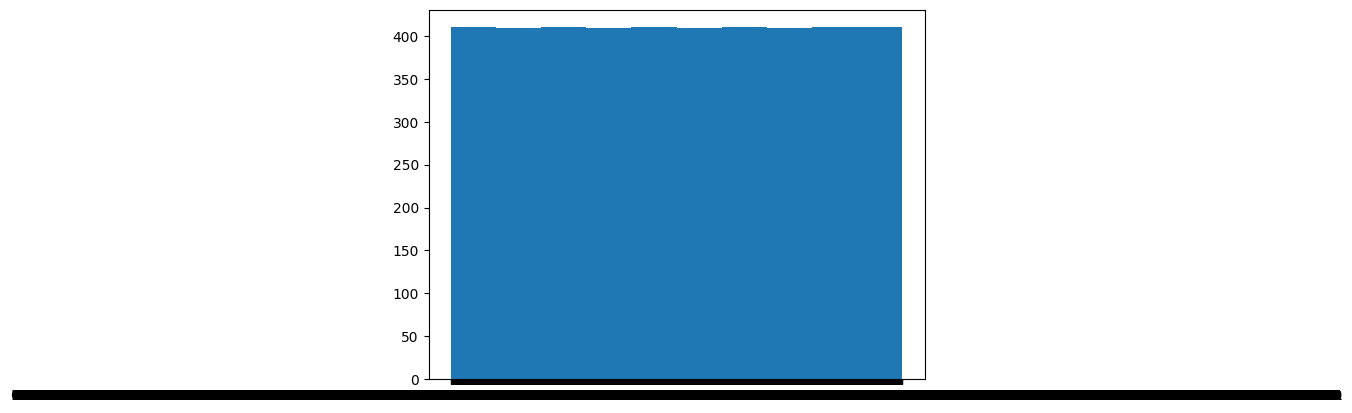

In [10]:
import matplotlib.pyplot as plt
# make a new Sampler object
sampler = Sampler(backend)

# run the experiment
job = sampler.run([qcEx2_isa_circuit])

# get the results
result = job.result()[0]

# interpret the results as a "counts" dictionary
counts_sampler = result.data.c.get_counts()

plt.hist(counts_sampler)

In [14]:
numbers = []
for bits in counts_sampler:
    temp = 0
    for i in range(len(bits)):
        temp += int(bits[i]) * 2 ** (len(bits) - i - 1)
    numbers.append(temp)
print(numbers)

[509705160110614491351132078594, 378308070456329791521220065453, 644923939486439915222533355996, 341429056617113918858554890776, 304102582564086753853272020805, 1203650253352281503278368758118, 278007449906498755324285402392, 603483353134251115943787352622, 873486014829538783859900059705, 976908598732308517214545512663, 234915795839184230097662677064, 301838352626518158169770891381, 89290260046635352301570300835, 859589903078962344104022139310, 30146501837602393556793810004, 912811047745357758089664331486, 842638912818224325872915408811, 552851050742748616128313279944, 719105921914819063741068948693, 426329931109965691641019834776, 79647581145058457984463645851, 574185851006924575162662094929, 843962310615753192891585981975, 1097256632133471174298461081545, 244437737696586762141865805631, 1084834440529968695628257407540, 153298598078734117450676440447, 906540665075125173338469157521, 465244701611254131880357212069, 188437327950672941100645268272, 1147974019541709311130095667559, 159655